In [6]:
from codecs import open #For func _read_documents
from __future__ import division #For func _read_documents
from collections import Counter #For frequency function
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Reading file for csv conversion
def read_documents(doc_file):
    labels = []
    docs = []
    all_docs_freq = []
    
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            
            #Noise reduction - Removing punctuation 
            line = line.replace(","," ")
            line = line.replace("."," ")
            line = line.replace('\"'," ")
            line = line.replace('('," ")
            line = line.replace(')'," ")
            line = line.replace('!'," ")
            
            #Storing data
            words = line.strip().split() 
            labels.append(words[1])
            docs.append(' '.join(words[4:]))
            all_docs_freq.append(words[4:])        
            
    return labels,docs,all_docs_freq

In [7]:
#Task 0

#Reading in data + removing document identifier and topic label
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame

all_labels, all_docs,all_docs_freq = read_documents('all_sentiment_shuffled.txt')

#Counting the frequency of words throughout all reviews
freq = Counter()
for i in range(len(all_docs_freq)):
    for w in all_docs_freq[i]: 
        freq[w] += 1

In [33]:
all_labels, all_docs,all_docs_freq = read_documents('all_sentiment_shuffled.txt')


#Function that creates and runs naive bayes with n number of features. Returns scores 
def models_n(n):
    
    num_of_features = n #Change this value to alter the number of features for the models
    common = freq.most_common(num_of_features) 
    features = []
    for i in range(len(common)):
        features.append(common[i][0])

        
    #Splitting data into training and testing set
    split_point = int(0.80*len(all_docs)) 
    train_docs = all_docs[:split_point] 
    target_train = all_labels[:split_point] 
    eval_docs = all_docs[split_point:] 
    target_test = all_labels[split_point:]


    #Formatting data using CountVectorizer 
    vect = CountVectorizer(vocabulary = features)
    data_train = vect.transform(train_docs)
    data_test = vect.transform(eval_docs)
    
    #Training and running naive bayes
    mnb = MultinomialNB(alpha = 0.05)
    pred = mnb.fit(data_train, target_train).predict(data_test)
    
    nb_accuracy = accuracy_score(target_test, pred, normalize = True)
    nb_recall = recall_score(target_test, pred, average = 'weighted')
    nb_precision = precision_score(target_test, pred, average = 'weighted')
    nb_f1 = f1_score(target_test, pred, average = 'weighted')
    
    nb_average = (nb_accuracy+nb_recall+nb_precision+nb_f1)/4
    
#     #Training and running base-DT
    clf = DecisionTreeClassifier(criterion = 'entropy')
    pred = clf.fit(data_train,target_train).predict(data_test)
    
    base_accuracy = accuracy_score(target_test, pred, normalize = True)
    base_recall = recall_score(target_test, pred, average = 'weighted')
    base_precision = precision_score(target_test, pred, average = 'weighted')
    base_f1 = f1_score(target_test, pred, average = 'weighted')
    
    base_average = (base_accuracy+base_recall+base_precision+base_f1)/4
    
    return nb_average, base_average



# Gathers the necessary vaules for the plots 
nb_performance = []
base_performance = []
feature_num = []

for i in range(500,len(freq),500):
    feature_num.append(i)
    nb ,base= models_n(i)

    nb_performance.append(nb)
    base_performance.append(base)

    

0.7040454363302715
107


53500

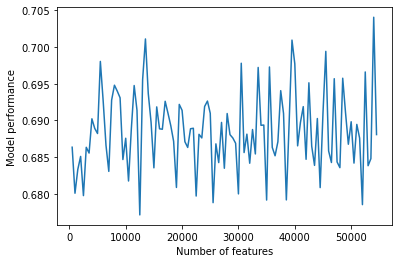

In [47]:
import matplotlib.pyplot as plt
import numpy as np
nb_performance
base_performance 

#PLOT FOR NAIVE BAYES - UNCOMMENT IF DESIRED

# plt.xlabel("Number of features")
# plt.ylabel("Model performance")
# plt.plot(feature_num, nb_performance)

# max_value = max(nb_performance)
# max_index = nb_performance.index(max_value)
# print(max_value)
# print(max_index)
# nb_performance[max_index]


#PLOT FOR BASE DT - UNCOMMENT IF DESIRED
# plt.xlabel("Number of features")
# plt.ylabel("Model performance")
# plt.plot(feature_num, base_performance)

# max_value = max(base_performance)
# max_index = base_performance.index(max_value)
# print(max_value)
# print(max_index)

